# Agenda
- Installation and import of neccessary packages
- Download neccesary corpus from NLTK
- Data Cleaning
  - Tokenization
  - Changing case
  - Spelling correction
  - POS Tagging
  - Named Entity Recognition
  - Stemming and  Lemmetization
  - Noise Entity Removal
    - Remove stop words
    - remove urls
    - remove punctuation
    - remove emoticons

In [1]:
#pip install nltk

In [2]:
#pip install spacy

In [3]:
#!python -m spacy download en_core_web_sm

In [4]:
#pip install svgling

In [5]:
import nltk
import spacy
import re
from string import punctuation

In [6]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [7]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
# import necessary corpuses
from nltk.corpus import stopwords
from nltk.corpus import wordnet


In [9]:
## Data Cleaning steps

In [10]:
text = """Embracing life's challenges is like navigating a journey. 🚀
Stay motivated, overcome hurdles, and explore new paths to success!
Check out inspiring stories at https://motivationalhub.com for an extra boost!"""
print(text)

Embracing life's challenges is like navigating a journey. 🚀
Stay motivated, overcome hurdles, and explore new paths to success!
Check out inspiring stories at https://motivationalhub.com for an extra boost!


In [11]:
## Tokenization
### Sentence Tokenization
sentences =  nltk.sent_tokenize(text)

In [12]:
for i in range(len(sentences)):
    print(f'{i} : {sentences[i]}')

0 : Embracing life's challenges is like navigating a journey.
1 : 🚀
Stay motivated, overcome hurdles, and explore new paths to success!
2 : Check out inspiring stories at https://motivationalhub.com for an extra boost!


In [13]:
### word Tokenization
word_tokens =  nltk.word_tokenize(text)
print(word_tokens)

['Embracing', 'life', "'s", 'challenges', 'is', 'like', 'navigating', 'a', 'journey', '.', '🚀', 'Stay', 'motivated', ',', 'overcome', 'hurdles', ',', 'and', 'explore', 'new', 'paths', 'to', 'success', '!', 'Check', 'out', 'inspiring', 'stories', 'at', 'https', ':', '//motivationalhub.com', 'for', 'an', 'extra', 'boost', '!']


In [14]:
word_tokens = text.split()
print(word_tokens)

['Embracing', "life's", 'challenges', 'is', 'like', 'navigating', 'a', 'journey.', '🚀', 'Stay', 'motivated,', 'overcome', 'hurdles,', 'and', 'explore', 'new', 'paths', 'to', 'success!', 'Check', 'out', 'inspiring', 'stories', 'at', 'https://motivationalhub.com', 'for', 'an', 'extra', 'boost!']


In [15]:
## Change case and split

words_lower_case =  text.lower().split()
print(words_lower_case)

['embracing', "life's", 'challenges', 'is', 'like', 'navigating', 'a', 'journey.', '🚀', 'stay', 'motivated,', 'overcome', 'hurdles,', 'and', 'explore', 'new', 'paths', 'to', 'success!', 'check', 'out', 'inspiring', 'stories', 'at', 'https://motivationalhub.com', 'for', 'an', 'extra', 'boost!']


In [16]:
# Spelling Correction

## tkenize the text
word_tokens =  text.lower().split()

## get the list ofenglish words

words =  nltk.corpus.words.words()



In [17]:
print(f'Total number of words in the  vocab {len(words)}')

Total number of words in the  vocab 236736


In [18]:
corrected_tokens = []
for token in word_tokens:
    corrected =  min(words, key = lambda x: nltk.edit_distance(x,token))
    corrected_tokens.append(corrected)
print(corrected_tokens)

['embracing', 'life', 'challenge', 'is', 'like', 'navigation', 'a', 'journey', 'A', 'stay', 'motivate', 'overcome', 'hurdies', 'and', 'explore', 'new', 'patas', 'to', 'success', 'check', 'out', 'inspiring', 'storied', 'at', 'motivational', 'for', 'an', 'extra', 'boost']


In [22]:
## POS Tagging
tagged =  nltk.pos_tag(word_tokens)
print(tagged)

[('embracing', 'VBG'), ("life's", 'NN'), ('challenges', 'NNS'), ('is', 'VBZ'), ('like', 'IN'), ('navigating', 'VBG'), ('a', 'DT'), ('journey.', 'NN'), ('🚀', 'NNP'), ('stay', 'NN'), ('motivated,', 'RB'), ('overcome', 'JJ'), ('hurdles,', 'NN'), ('and', 'CC'), ('explore', 'VB'), ('new', 'JJ'), ('paths', 'NNS'), ('to', 'TO'), ('success!', 'VB'), ('check', 'VB'), ('out', 'RP'), ('inspiring', 'VBG'), ('stories', 'NNS'), ('at', 'IN'), ('https://motivationalhub.com', 'NN'), ('for', 'IN'), ('an', 'DT'), ('extra', 'JJ'), ('boost!', 'NN')]


In [21]:
 nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [23]:
example =''' Microsoft is a multinational technology company that was founded in 1975 by Bill Gates and Paul Allen.
The company is headquartered in Redmond, Washington. Microsoft is one of the most valuable public companies in the United States. '''
print(example)

 Microsoft is a multinational technology company that was founded in 1975 by Bill Gates and Paul Allen. 
The company is headquartered in Redmond, Washington. Microsoft is one of the most valuable public companies in the United States. 


In [24]:
word_tokens =  nltk.word_tokenize(example)
print(word_tokens)

['Microsoft', 'is', 'a', 'multinational', 'technology', 'company', 'that', 'was', 'founded', 'in', '1975', 'by', 'Bill', 'Gates', 'and', 'Paul', 'Allen', '.', 'The', 'company', 'is', 'headquartered', 'in', 'Redmond', ',', 'Washington', '.', 'Microsoft', 'is', 'one', 'of', 'the', 'most', 'valuable', 'public', 'companies', 'in', 'the', 'United', 'States', '.']


In [25]:
nltk.pos_tag(word_tokens)

[('Microsoft', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('multinational', 'JJ'),
 ('technology', 'NN'),
 ('company', 'NN'),
 ('that', 'WDT'),
 ('was', 'VBD'),
 ('founded', 'VBN'),
 ('in', 'IN'),
 ('1975', 'CD'),
 ('by', 'IN'),
 ('Bill', 'NNP'),
 ('Gates', 'NNP'),
 ('and', 'CC'),
 ('Paul', 'NNP'),
 ('Allen', 'NNP'),
 ('.', '.'),
 ('The', 'DT'),
 ('company', 'NN'),
 ('is', 'VBZ'),
 ('headquartered', 'VBN'),
 ('in', 'IN'),
 ('Redmond', 'NNP'),
 (',', ','),
 ('Washington', 'NNP'),
 ('.', '.'),
 ('Microsoft', 'NNP'),
 ('is', 'VBZ'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('most', 'RBS'),
 ('valuable', 'JJ'),
 ('public', 'JJ'),
 ('companies', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('United', 'NNP'),
 ('States', 'NNPS'),
 ('.', '.')]

In [29]:
pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 5.3 MB/s eta 0:00:00


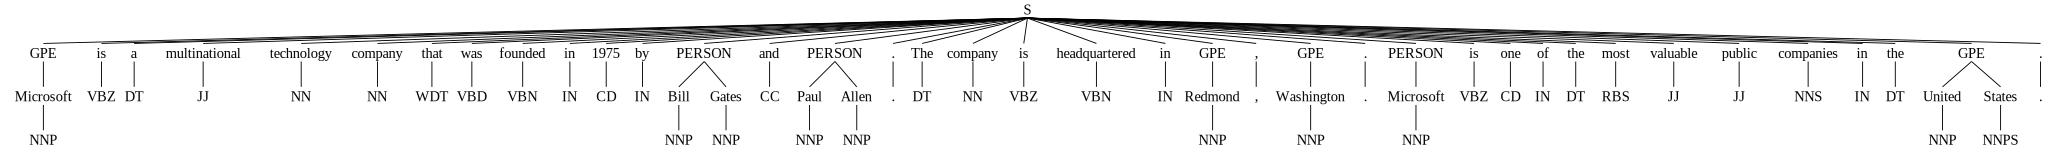

In [30]:
nltk.ne_chunk(nltk.pos_tag(word_tokens))

In [27]:
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

In [31]:
# NER through SPACY
nlp =  spacy.load('en_core_web_sm')

In [32]:
doc =  nlp(example)

In [34]:
type(doc)

spacy.tokens.doc.Doc

In [36]:
entities  = [(ent.text, ent.label_) for ent in doc.ents]

In [37]:
entities

[('Microsoft', 'ORG'),
 ('1975', 'DATE'),
 ('Bill Gates', 'PERSON'),
 ('Paul Allen', 'PERSON'),
 ('Redmond', 'GPE'),
 ('Washington', 'GPE'),
 ('Microsoft', 'ORG'),
 ('one', 'CARDINAL'),
 ('the United States', 'GPE')]

In [38]:
# Stemming and Lemmatization

In [39]:
print(text)

Embracing life's challenges is like navigating a journey. 🚀
Stay motivated, overcome hurdles, and explore new paths to success!
Check out inspiring stories at https://motivationalhub.com for an extra boost!


In [40]:
# Stemming using porterstemmer

In [41]:
word_tokens =  text.lower().split()

In [42]:
# instantiate porterstemmer


stemmer =  nltk.stem.PorterStemmer()

stemmed_tokens =  [stemmer.stem(token) for token in word_tokens]
print(text)
print(stemmed_tokens)

Embracing life's challenges is like navigating a journey. 🚀
Stay motivated, overcome hurdles, and explore new paths to success!
Check out inspiring stories at https://motivationalhub.com for an extra boost!
['embrac', "life'", 'challeng', 'is', 'like', 'navig', 'a', 'journey.', '🚀', 'stay', 'motivated,', 'overcom', 'hurdles,', 'and', 'explor', 'new', 'path', 'to', 'success!', 'check', 'out', 'inspir', 'stori', 'at', 'https://motivationalhub.com', 'for', 'an', 'extra', 'boost!']


In [45]:
# intantiate snowball stemmer for english
stemmer2 =  nltk.stem.SnowballStemmer('english')

stemmed_tokens2 =  [stemmer2.stem(token) for token in word_tokens]
print(text)
print(stemmed_tokens2)

Embracing life's challenges is like navigating a journey. 🚀
Stay motivated, overcome hurdles, and explore new paths to success!
Check out inspiring stories at https://motivationalhub.com for an extra boost!
['embrac', 'life', 'challeng', 'is', 'like', 'navig', 'a', 'journey.', '🚀', 'stay', 'motivated,', 'overcom', 'hurdles,', 'and', 'explor', 'new', 'path', 'to', 'success!', 'check', 'out', 'inspir', 'stori', 'at', 'https://motivationalhub.com', 'for', 'an', 'extra', 'boost!']


In [46]:
from operator import le
# Lemmatization
# instantiate nltk wordnet lemmatizer
lemmatizer =  nltk.stem.WordNetLemmatizer()


lemmatized_token =  [lemmatizer.lemmatize(token) for token in word_tokens]
print(text)
print(lemmatized_token)



Embracing life's challenges is like navigating a journey. 🚀
Stay motivated, overcome hurdles, and explore new paths to success!
Check out inspiring stories at https://motivationalhub.com for an extra boost!
['embracing', "life's", 'challenge', 'is', 'like', 'navigating', 'a', 'journey.', '🚀', 'stay', 'motivated,', 'overcome', 'hurdles,', 'and', 'explore', 'new', 'path', 'to', 'success!', 'check', 'out', 'inspiring', 'story', 'at', 'https://motivationalhub.com', 'for', 'an', 'extra', 'boost!']
